In [1]:
import json
import pandas as pd
from pymongo import MongoClient
from helpers import plotOwners, plotNewOwners, remove0s, count0s

In [2]:
client = MongoClient('localhost', 27017)
db = client.steamspy

In [3]:
data = pd.DataFrame(list(db.clean.find()))

In [4]:
data.drop(columns = "_id", inplace = True) #drop _id column

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33099 entries, 0 to 33098
Data columns (total 18 columns):
Genres             33099 non-null object
Tags               33099 non-null object
appid              33099 non-null int64
average_2weeks     33099 non-null int64
average_forever    33099 non-null int64
developer          33099 non-null object
initialprice       33077 non-null object
llOwners           33099 non-null float64
median_2weeks      33099 non-null int64
median_forever     33099 non-null int64
name               33099 non-null object
negative           33099 non-null int64
positive           33099 non-null int64
price              33070 non-null object
publisher          33099 non-null object
score_rank         33099 non-null object
ulOwners           33099 non-null float64
userscore          33099 non-null int64
dtypes: float64(2), int64(8), object(8)
memory usage: 4.5+ MB


In [6]:
#gamefeatures= pd.read_csv("gamefeatures.csv")

In [7]:
#gamefeatures = gamefeatures.rename(columns = {'QueryID':'id'})

In [8]:
# gamefeatures = gamefeatures.drop(columns = ['ResponseID', 'QueryName', 'ResponseName', 'DemoCount', 'DeveloperCount', 'DLCCount',
#                             'MovieCount', 'PackageCount', 'PublisherCount', 'ScreenshotCount',
#                             'SteamSpyOwners', 'SteamSpyOwnersVariance', 'SteamSpyPlayersEstimate',
#                             'SteamSpyPlayersVariance', 'AchievementHighlightedCount', 'IsFree', 'FreeVerAvail',
#                             'PurchaseAvail', 'PCReqsHaveMin', 'PCReqsHaveRec', 'LinuxReqsHaveMin', 
#                             'LinuxReqsHaveRec', 'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
#                             'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase',
#                             'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport', 
#                             'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
#                             'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation', 'GenreIsEarlyAccess', 
#                             'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 
#                             'PriceCurrency', 'PriceInitial', 'PriceFinal', 'SupportEmail', 'SupportURL', 
#                             'AboutText', 'Background', 'ShortDescrip', 'DetailedDescrip', 'DRMNotice', 
#                             'ExtUserAcctNotice', 'HeaderImage', 'LegalNotice', 'Reviews', 'SupportedLanguages',
#                             'Website', 'PCMinReqsText', 'PCRecReqsText', 'LinuxMinReqsText', 'LinuxRecReqsText',
#                             'MacMinReqsText', 'MacRecReqsText']) #dropping useless columns

In [9]:
#gamefeatures = gamefeatures.rename(columns = {'id':'appid'}) #match datas id column

In [10]:
#df = pd.merge(gamefeatures, data, on=['appid'], how='left')

In [11]:
#merged = db.merged

In [12]:
#records = json.loads(df.T.to_json()).values() #store the merged df in mongo
#merged.insert(records)

In [13]:
free = data[data['Genres'].apply(lambda x: 'Free' in x)] 
freeIndie = free[free['Genres'].apply(lambda x: 'Indie' in x)]
freeNotIndie = free[free['Genres'].apply(lambda x: 'Indie' not in x)]
paid = data[data['Genres'].apply(lambda x: 'Free' not in x)] 
paidIndie = paid[paid['Genres'].apply(lambda x: 'Indie' in x)]
paidNotIndie = paid[paid['Genres'].apply(lambda x: 'Indie' not in x)]

In [14]:
freeIndieOwnersL = freeIndie['llOwners'].sum()
paidIndieOwnersL = paidIndie['llOwners'].sum()
freeIndieOwnersU = freeIndie['ulOwners'].sum()
paidIndieOwnersU = paidIndie['ulOwners'].sum()
freeNotIndieOwnersL = freeNotIndie['llOwners'].sum()
paidNotIndieOwnersL = paidNotIndie['llOwners'].sum()
freeNotIndieOwnersU = freeNotIndie['ulOwners'].sum()
paidNotIndieOwnersU = paidNotIndie['ulOwners'].sum()

In [15]:
dfFree = pd.DataFrame({'Type':['Free Indie', 'Free non Indie', 'Paid Indie', 'Paid non Indie'], 
                       'Lower Limit Owners':[freeIndieOwnersL, freeNotIndieOwnersL, paidIndieOwnersL, paidNotIndieOwnersL],
                       'Upper Limit Owners':[freeIndieOwnersU, freeNotIndieOwnersU, paidIndieOwnersU, paidNotIndieOwnersU]})

In [16]:
dfFree['avgOwners'] = (dfFree['Lower Limit Owners'] + dfFree['Upper Limit Owners'])/2

In [17]:
dfFree.drop(columns = ['Lower Limit Owners', 'Upper Limit Owners'], inplace = True)

In [18]:
import matplotlib.pyplot as plt

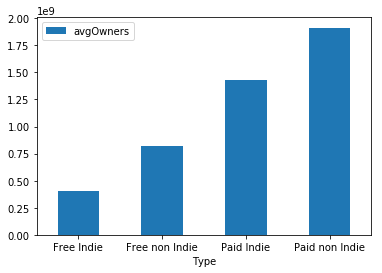

In [19]:
ax = dfFree.plot.bar(x = 'Type',rot=0) # number of free and paid games owned by people

In [20]:
action = data[data['Genres'].apply(lambda x: 'Action' in x)]
earlyAccess = data[data['Genres'].apply(lambda x: 'Early Access' in x)]
strategy = data[data['Genres'].apply(lambda x: 'Strategy' in x)]
rpg = data[data['Genres'].apply(lambda x: 'RPG' in x)]
indie = data[data['Genres'].apply(lambda x: 'Indie' in x)]
adventure = data[data['Genres'].apply(lambda x: 'Adventure' in x)]
sports = data[data['Genres'].apply(lambda x: 'Sports' in x)]
simulation = data[data['Genres'].apply(lambda x: 'Simulation' in x)]
exEarlyAccess = data[data['Genres'].apply(lambda x: 'Ex Early Access' in x)]
mmo = data[data['Genres'].apply(lambda x: 'MMO' in x)]
theGenres = [action, earlyAccess, strategy, rpg, indie, adventure, sports, simulation, exEarlyAccess, mmo]
genreNames = ['Action', 'Early Access', 'Strategy', 'RPG', 'Indie', 'Adventure', 'Sports',
              'Simulation', 'Ex Early Access', 'MMO']

In [21]:
#making price column ints and making price of free games 0
data['price'] = data['price'].fillna(0)
data['price'] = data['price'].astype(int)

In [22]:
data['negative'] = data['negative'].astype(int)
data['positive'] = data['positive'].astype(int)

In [23]:
data['Like/Dislike Ratio'] = data['positive']/data['negative']

In [24]:
free = data[data.price == 0]
paid10 = data[(data.price < 1001) & (data.price > 0)] #games between 0.01-10 dollars
paid20 = data[(data.price > 1000) & (data.price < 2001)]
paid30 = data[(data.price > 2000) & (data.price < 3001)]
paid40 = data[(data.price > 3000) & (data.price < 4001)]
paid50 = data[(data.price > 4000) & (data.price < 5001)]
paid60 = data[(data.price > 5000) & (data.price < 6001)]
paidOver60 = data[data.price > 6000]

In [25]:
priceOfGame = [free, paid10, paid20, paid30, paid40, paid50, paid60, paidOver60]
priceNames = ['Free', 'Paid 10', 'Paid 20', 'Paid 30', 'Paid 40', 'Paid 50', 'Paid 60', 'Paid Over 60']

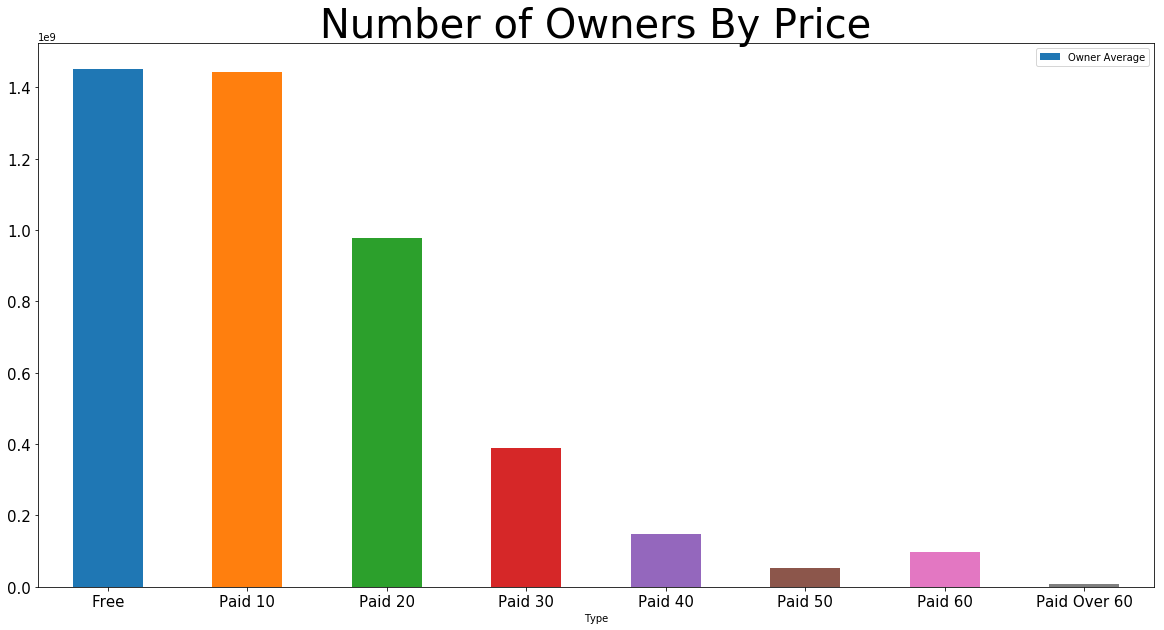

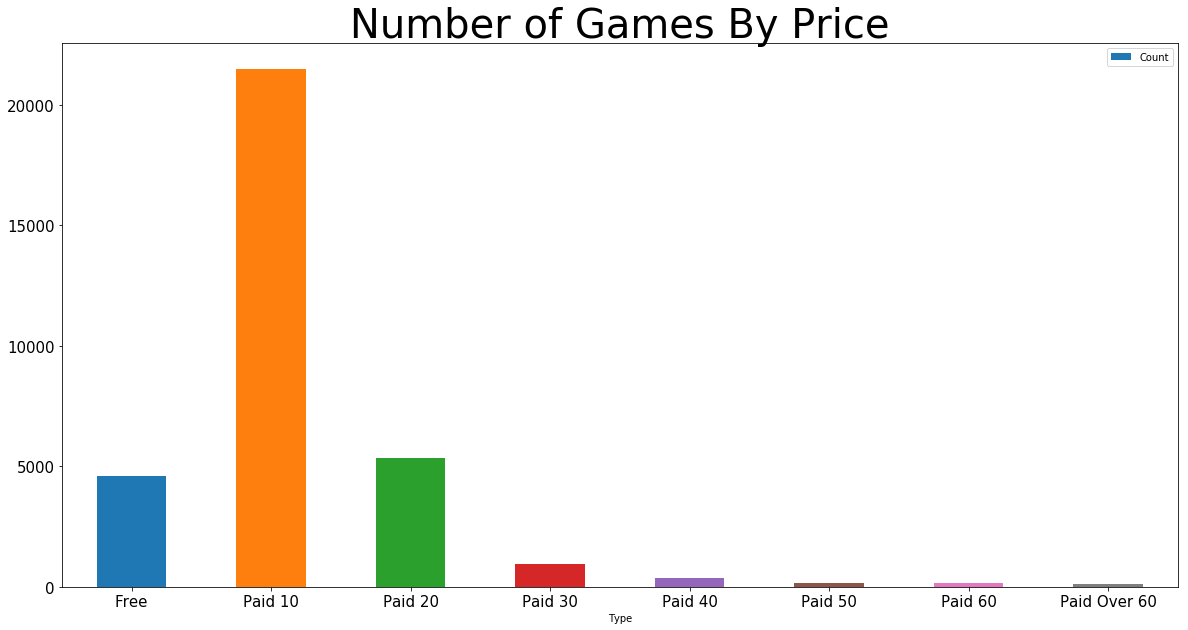

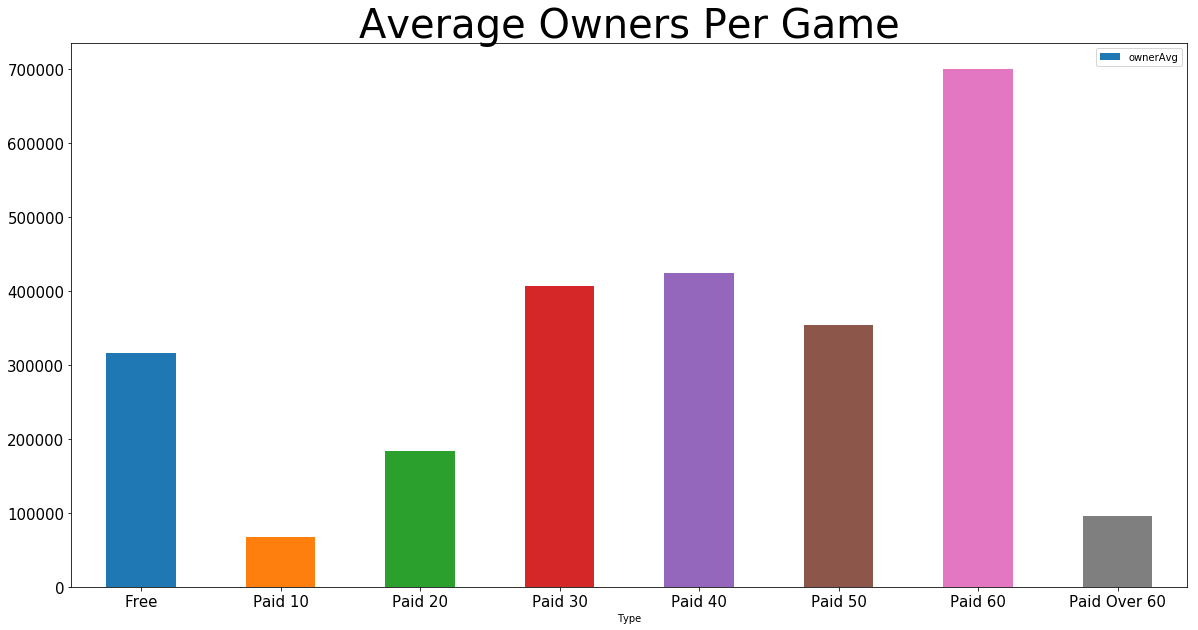

In [26]:
#owners by price point without truncation
plotOwners(priceOfGame, priceNames, title1 = "Number of Owners By Price", title2 = "Number of Games By Price",
           title3 = "Average Owners Per Game")

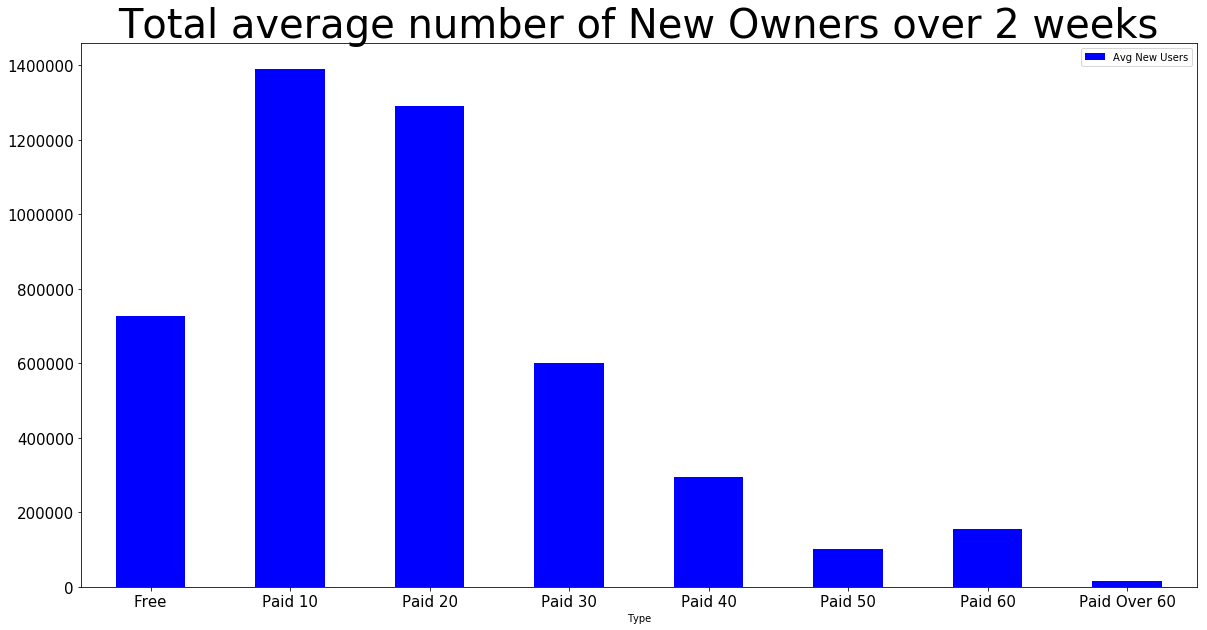

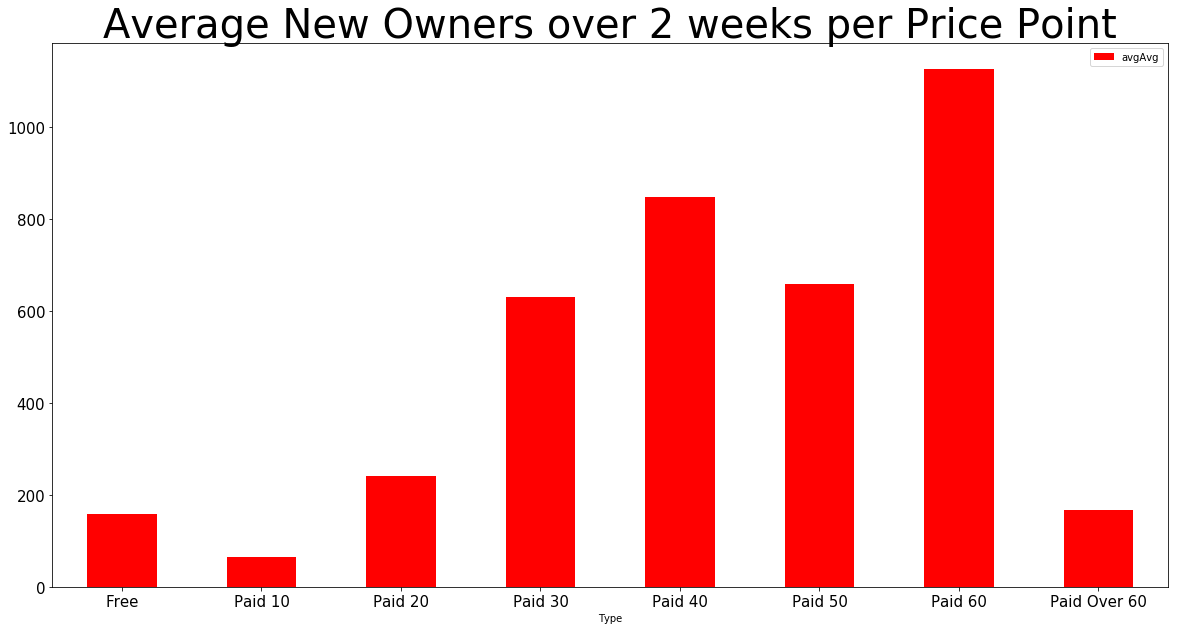

In [27]:
plotNewOwners(priceOfGame, priceNames, title1 = "Total average number of New Owners over 2 weeks", 
              title3 = "Average New Owners over 2 weeks per Price Point")

In [28]:
data.head(20)

,Genres,Tags,appid,average_2weeks,average_forever,developer,initialprice,llOwners,median_2weeks,median_forever,name,negative,positive,price,publisher,score_rank,ulOwners,userscore,Like/Dislike Ratio
0,"[Action, Strategy, Free]","[Multiplayer, Co-op, Difficult, Fantasy, Onlin...",570,1644,29989,Valve,0,100000000.0,765,1284,Dota 2,174020,1018172,0,Valve,,200000000.0,0,5.850891
1,"[Action, Adventure, Ex Early Access, MMO]","[Casual, Multiplayer, Open+World, Co-op, Diffi...",578080,731,22291,PUBG Corporation,2999,50000000.0,319,10240,PLAYERUNKNOWN'S BATTLEGROUNDS,584495,678327,2999,PUBG Corporation,,100000000.0,0,1.160535
2,"[Action, Free]","[Multiplayer, Co-op, Shooter, First-Person, Fu...",440,1377,8895,Valve,0,50000000.0,213,452,Team Fortress 2,37107,588020,0,Valve,,100000000.0,0,15.846606
3,"[Action, Free]","[Multiplayer, Co-op, Difficult, Shooter, First...",730,969,25886,"Valve, Hidden Path Entertainment",0,20000000.0,363,7129,Counter-Strike: Global Offensive,470639,3295593,0,Valve,,50000000.0,0,7.002380
4,"[Action, Indie, Adventure, Ex Early Access, Free]","[Singleplayer, Casual, Multiplayer, Atmospheri...",304930,1091,2739,Smartly Dressed Games,0,20000000.0,39,298,Unturned,33383,321907,0,Smartly Dressed Games,,50000000.0,0,9.642842
5,"[Action, Free]","[Singleplayer, Multiplayer, Co-op, Shooter, Sc...",230410,549,6329,Digital Extremes,0,20000000.0,202,367,Warframe,28276,296005,0,Digital Extremes,,50000000.0,0,10.468418
6,"[Action, Adventure]","[Singleplayer, Multiplayer, Great+Soundtrack, ...",271590,608,8587,Rockstar North,2999,20000000.0,272,4645,Grand Theft Auto V,158455,518775,2999,Rockstar Games,,50000000.0,0,3.273958
7,[Action],"[Multiplayer, Open+World, Shooter, First-Perso...",10,287,12988,Valve,999,20000000.0,36,166,Counter-Strike,3754,144330,999,Valve,,50000000.0,0,38.446990
8,"[Action, Indie, Ex Early Access, Free]","[Singleplayer, Casual, Multiplayer, 2D, Co-op,...",291550,336,1682,Blue Mammoth Games,0,20000000.0,140,162,Brawlhalla,18937,105911,0,Ubisoft,,50000000.0,0,5.592808
9,[Action],"[Singleplayer, Multiplayer, Atmospheric, Diffi...",240,97,6682,Valve,999,20000000.0,55,564,Counter-Strike: Source,4020,93460,999,Valve,,50000000.0,0,23.248756


In [29]:
# ordereddata = data.sort_values(by=['llOwners','ulOwners'], ascending=False)
# truncatedData = ordereddata.iloc[20:]
truncatedData = data[data['llOwners'] < 10000000]

In [30]:
free = truncatedData[truncatedData.price == 0]
paid10 = truncatedData[(truncatedData.price < 1001) & (truncatedData.price > 0)] #games between 0.01-10 dollars
paid20 = truncatedData[(truncatedData.price > 1000) & (truncatedData.price < 2001)]
paid30 = truncatedData[(truncatedData.price > 2000) & (truncatedData.price < 3001)]
paid40 = truncatedData[(truncatedData.price > 3000) & (truncatedData.price < 4001)]
paid50 = truncatedData[(truncatedData.price > 4000) & (truncatedData.price < 5001)]
paid60 = truncatedData[(truncatedData.price > 5000) & (truncatedData.price < 6001)]
paidOver60 = truncatedData[truncatedData.price > 6000]

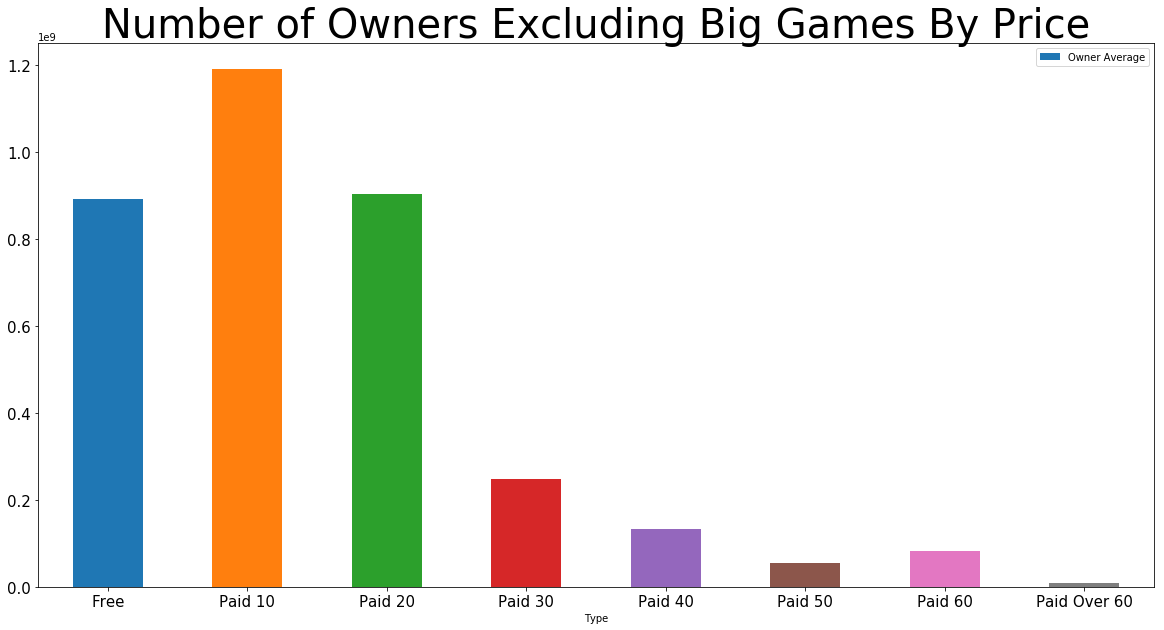

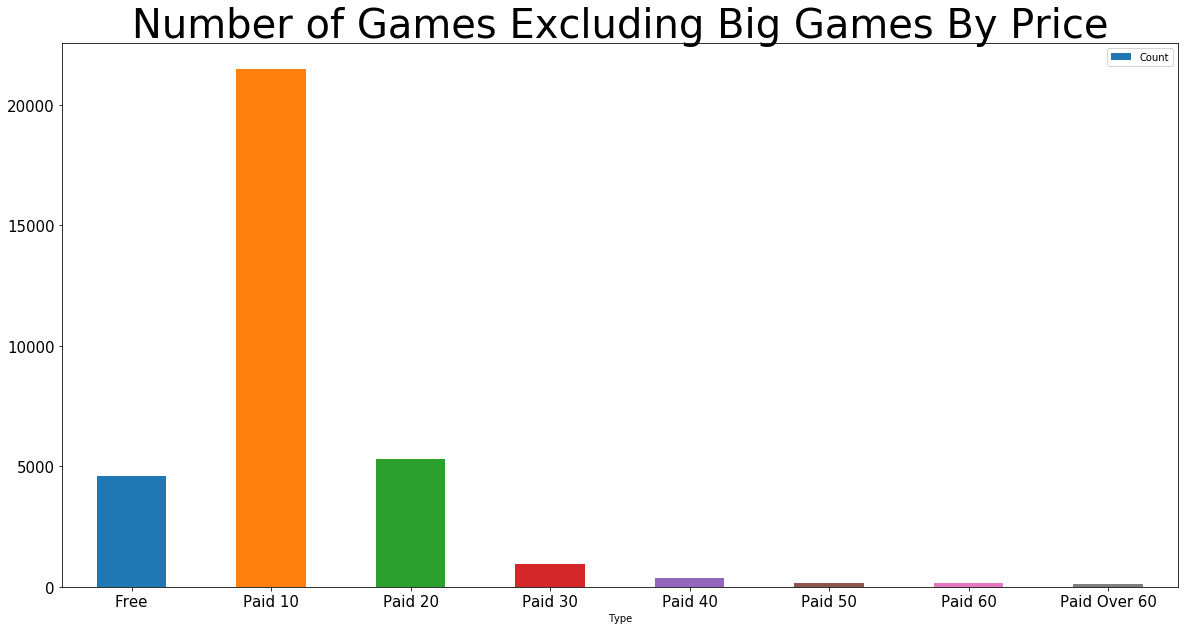

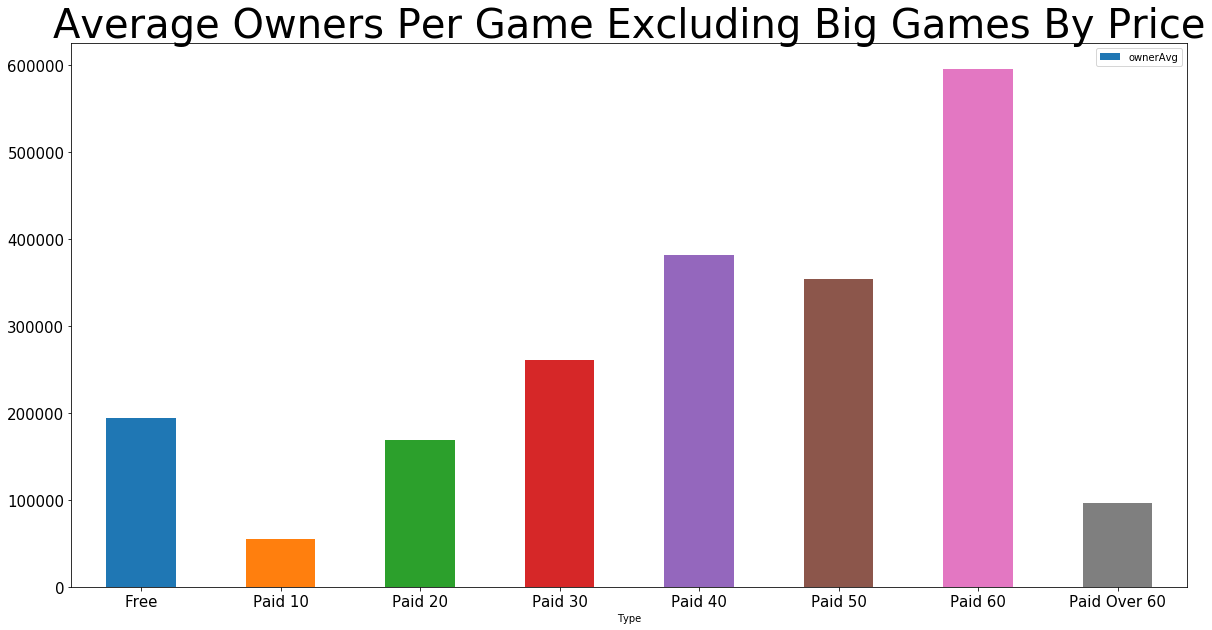

In [31]:
#owners of price points without top 20
priceOfGame = [free, paid10, paid20, paid30, paid40, paid50, paid60, paidOver60]
priceNames = ['Free', 'Paid 10', 'Paid 20', 'Paid 30', 'Paid 40', 'Paid 50', 'Paid 60', 'Paid Over 60']
plotOwners(priceOfGame, priceNames, title1 = "Number of Owners Excluding Big Games By Price", title2 = 
           "Number of Games Excluding Big Games By Price", 
           title3 = "Average Owners Per Game Excluding Big Games By Price")

In [32]:
data.head()

,Genres,Tags,appid,average_2weeks,average_forever,developer,initialprice,llOwners,median_2weeks,median_forever,name,negative,positive,price,publisher,score_rank,ulOwners,userscore,Like/Dislike Ratio
0,"[Action, Strategy, Free]","[Multiplayer, Co-op, Difficult, Fantasy, Onlin...",570,1644,29989,Valve,0,100000000.0,765,1284,Dota 2,174020,1018172,0,Valve,,200000000.0,0,5.850891
1,"[Action, Adventure, Ex Early Access, MMO]","[Casual, Multiplayer, Open+World, Co-op, Diffi...",578080,731,22291,PUBG Corporation,2999,50000000.0,319,10240,PLAYERUNKNOWN'S BATTLEGROUNDS,584495,678327,2999,PUBG Corporation,,100000000.0,0,1.160535
2,"[Action, Free]","[Multiplayer, Co-op, Shooter, First-Person, Fu...",440,1377,8895,Valve,0,50000000.0,213,452,Team Fortress 2,37107,588020,0,Valve,,100000000.0,0,15.846606
3,"[Action, Free]","[Multiplayer, Co-op, Difficult, Shooter, First...",730,969,25886,"Valve, Hidden Path Entertainment",0,20000000.0,363,7129,Counter-Strike: Global Offensive,470639,3295593,0,Valve,,50000000.0,0,7.002380
4,"[Action, Indie, Adventure, Ex Early Access, Free]","[Singleplayer, Casual, Multiplayer, Atmospheri...",304930,1091,2739,Smartly Dressed Games,0,20000000.0,39,298,Unturned,33383,321907,0,Smartly Dressed Games,,50000000.0,0,9.642842


If had more time would look into metacritic score, userscore, developer, publisher

In [33]:
data.drop(columns = ["appid", "average_2weeks", "developer", "initialprice", 
                                  "median_2weeks", "median_forever", "negative", "positive",
                                  "publisher", "score_rank", "userscore"], inplace = True) #drop _id column

In [34]:
columnsTitles=["name","Genres", "Tags", "average_forever", "price", "llOwners", "ulOwners", "Like/Dislike Ratio"]
data=data.reindex(columns=columnsTitles)
data.head()


,name,Genres,Tags,average_forever,price,llOwners,ulOwners,Like/Dislike Ratio
0,Dota 2,"[Action, Strategy, Free]","[Multiplayer, Co-op, Difficult, Fantasy, Onlin...",29989,0,100000000.0,200000000.0,5.850891
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"[Action, Adventure, Ex Early Access, MMO]","[Casual, Multiplayer, Open+World, Co-op, Diffi...",22291,2999,50000000.0,100000000.0,1.160535
2,Team Fortress 2,"[Action, Free]","[Multiplayer, Co-op, Shooter, First-Person, Fu...",8895,0,50000000.0,100000000.0,15.846606
3,Counter-Strike: Global Offensive,"[Action, Free]","[Multiplayer, Co-op, Difficult, Shooter, First...",25886,0,20000000.0,50000000.0,7.002380
4,Unturned,"[Action, Indie, Adventure, Ex Early Access, Free]","[Singleplayer, Casual, Multiplayer, Atmospheri...",2739,0,20000000.0,50000000.0,9.642842


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33099 entries, 0 to 33098
Data columns (total 8 columns):
name                  33099 non-null object
Genres                33099 non-null object
Tags                  33099 non-null object
average_forever       33099 non-null int64
price                 33099 non-null int64
llOwners              33099 non-null float64
ulOwners              33099 non-null float64
Like/Dislike Ratio    32623 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 2.0+ MB
